In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
path = "/content/gdrive/MyDrive/praktikmML/praktikum12"

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [10]:
data = pd.read_csv('/content/gdrive/MyDrive/PraktikumML/praktikum12/data/data.csv')

data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [20]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [31]:
data = data.drop(columns=['id'], errors='ignore')

data = data.dropna(axis=1, how='all')


In [22]:
data['diagnosis'] = data['diagnosis'].map({
    'M': 1,   # Malignant
    'B': 0    # Benign
})


In [23]:
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']


In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [25]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)


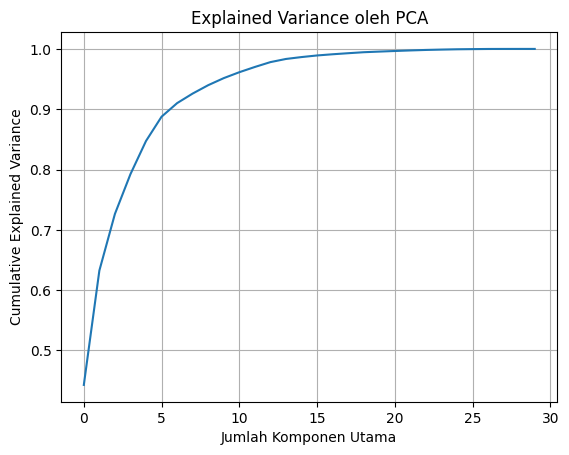

In [26]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Jumlah Komponen Utama')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance oleh PCA')
plt.grid()
plt.show()


In [27]:
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)


In [28]:
pca_df = pd.DataFrame(
    X_pca_2,
    columns=['Principal Component 1', 'Principal Component 2']
)

pca_df['Diagnosis'] = y.values


/tmp/ipython-input-1165571932.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


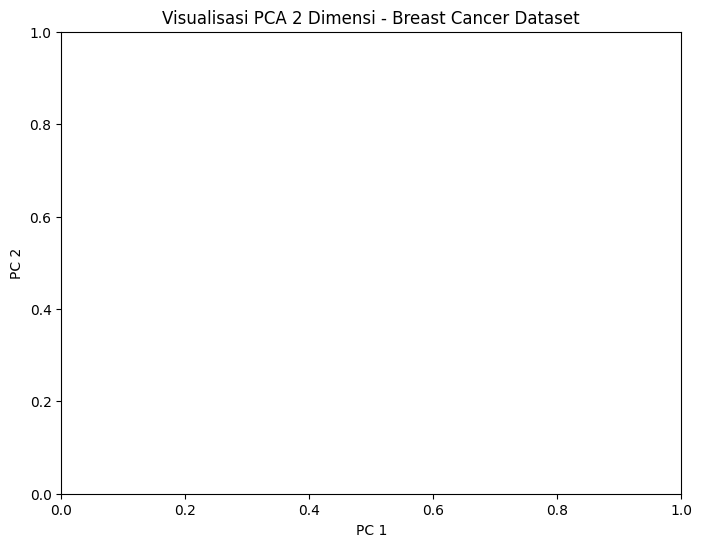

In [29]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Principal Component 1',
    y='Principal Component 2',
    hue='Diagnosis',
    data=pca_df,
    palette='Set1'
)

plt.title('Visualisasi PCA 2 Dimensi - Breast Cancer Dataset')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()


In [32]:
print("Explained Variance PC1 & PC2:")
print(pca_2.explained_variance_ratio_)
print("Total Variance:", sum(pca_2.explained_variance_ratio_))


Explained Variance PC1 & PC2:
[0.44272026 0.18971182]
Total Variance: 0.6324320765155944
